In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [73]:
data=pd.read_csv("C:\Mydata\ML Course\machine-learning-ex\ex2\ex2data2.txt",header=None)
data.columns=['x1','x2','y']
data

,x1,x2,y
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


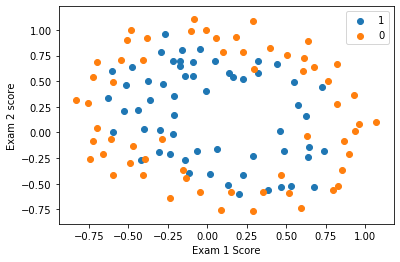

In [74]:
x=data.iloc[:,0:2]
y=data.iloc[:,2]
pos=[]
neg=[]
for i in range(len(y)):
    if y[i]==1:
        pos.append(i)
    else:
        neg.append(i)
plt.scatter(x.iloc[pos,0],x.iloc[pos,1],label='1')
plt.scatter(x.iloc[neg,0],x.iloc[neg,1],label='0')
plt.legend(loc='upper right')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 score')
plt.show()

In [9]:
##splitting the data into train_test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
##fitting the logistic regression model to training data
logreg=LogisticRegression()
model=logreg.fit(x_train,y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
#predicting the output for test data
y_pred=logreg.predict(x_test)

In [16]:
##calculating the accuracy of model
score=logreg.score(x_test,y_test)
score

0.4444444444444444

In [17]:
conf_matrix=metrics.confusion_matrix(y_test,y_pred)
conf_matrix

array([[ 9,  7],
       [13,  7]], dtype=int64)

In [20]:
model.coef_


array([[-0.32484343,  0.3188444 ]])

In [21]:
model.intercept_

array([-0.18900617])

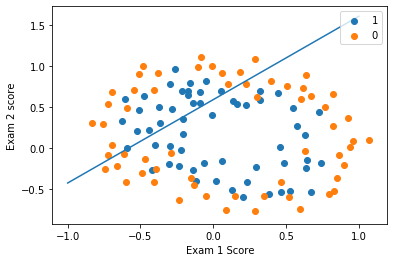

In [24]:
##Ploting decision boundary
x_pt=np.linspace(-1,1,1000)
y_pt=((0.32484343/0.3188444)*x_pt)-((-0.18900617/0.3188444))
plt.plot(x_pt,y_pt)
plt.scatter(x.iloc[pos,0],x.iloc[pos,1],label='1')
plt.scatter(x.iloc[neg,0],x.iloc[neg,1],label='0')
plt.legend(loc='upper right')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 score')
plt.show()

In [75]:
x['x1^2']=np.square(x['x1'])
x['x2^2']=np.square(x['x2'])
x['x1*x2']=x['x1']*x['x2']

In [76]:
x

,x1,x2,x1^2,x2^2,x1*x2
0,0.051267,0.699560,0.002628,0.489384,0.035864
1,-0.092742,0.684940,0.008601,0.469143,-0.063523
2,-0.213710,0.692250,0.045672,0.479210,-0.147941
3,-0.375000,0.502190,0.140625,0.252195,-0.188321
4,-0.513250,0.465640,0.263426,0.216821,-0.238990
...,...,...,...,...,...
113,-0.720620,0.538740,0.519293,0.290241,-0.388227
114,-0.593890,0.494880,0.352705,0.244906,-0.293904
115,-0.484450,0.999270,0.234692,0.998541,-0.484096
116,-0.006336,0.999270,0.000040,0.998541,-0.006332


In [77]:
##splitting the data into train_test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [78]:
##fitting the logistic regression model to training data
logreg=LogisticRegression()
model=logreg.fit(x_train,y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
#predicting the output for test data
y_pred=logreg.predict(x_test)

In [80]:
##calculating the accuracy of model
score=logreg.score(x_test,y_test)
score

0.8125

In [81]:
conf_matrix=metrics.confusion_matrix(y_test,y_pred)
conf_matrix

array([[21,  2],
       [ 7, 18]], dtype=int64)

In [82]:
model.coef_

array([[ 0.24187363,  0.60484344, -1.79758563, -1.74898444, -0.5373587 ]])

In [83]:
model.intercept_

array([0.69977672])

In [84]:
coef=model.coef_
a=coef[0][0]
b=coef[0][1]
c=coef[0][2]
d=coef[0][3]
e=coef[0][4]
f=model.intercept_[0]
x1=x['x1']
x2=x['x2']

In [90]:

t1=-((e*x1)+b)
t2=np.square(t1)
t3=(4*d)*((a*x1)+c*(np.square(x1))+f)
t4=2*d
x2=(t1+(np.sqrt(t2-t3)))/t4
x2_1=(t1-(np.sqrt(t2-t3)))/t4

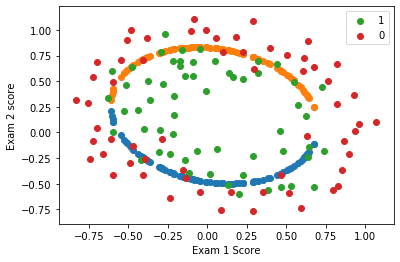

In [91]:
plt.scatter(x1,x2)
plt.scatter(x1,x2_1)
plt.scatter(x.iloc[pos,0],x.iloc[pos,1],label='1')
plt.scatter(x.iloc[neg,0],x.iloc[neg,1],label='0')
plt.legend(loc='upper right')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 score')
plt.show()